# Oscilador Armónico
Solución Numérica. Notebook original y modificado de https://github.com/olegs22  olegs@fisica.ugto.mx

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#import seaborn as sb

In [2]:
#sb.set_style('white')

Definimos la forma funcional de la ecución a solucionar 

$$\ddot{x}+\frac{k}{m}x = 0$$

Y la escribimos como un conjunto de edo's de primer orde, tal que:

$$\dot{v} + \frac{k}{m}x = 0$$
$$\dot{x} = v(x)$$

# Método de Euler

In [4]:

def S2_ode(fun, init_c, consts, steps, h):
        x0, v0, t0 = init_c
        c1,c2 = consts
        
        x = np.zeros(steps+1)
        v = np.zeros(steps+1)
        t = np.zeros(steps+1)
        
        #apply initial conditions
        x[0] = x0
        v[0] = v0
        t[0] = t0
        
        for i in range(steps):
            x[i+1] = x[i] + h * v[i] 
            v[i+1] = v[i] + h * fun(x[i],c1,c2)
            t[i+1]  =t[i] + h 
        
        return x, v, t 

In [5]:
def equation(z,k,m):
    omega = np.sqrt(k/m)
    return -(omega**2)*z

In [7]:
k1 = 2.
m1 = 1.
omega1 = np.sqrt(k1/m1)

In [25]:
pos, vel, time = S2_ode(equation,(0.0,2.,0.),(k1,m1),30000,1e-3)
pos,vel,time

(array([ 0.        ,  0.002     ,  0.004     , ..., -1.45717403,
        -1.4571492 , -1.45712145]),
 array([2.        , 2.        , 1.999996  , ..., 0.02483194, 0.02774629,
        0.03066059]),
 array([0.0000e+00, 1.0000e-03, 2.0000e-03, ..., 2.9998e+01, 2.9999e+01,
        3.0000e+01]))

Text(0,0.5,'v(t)')

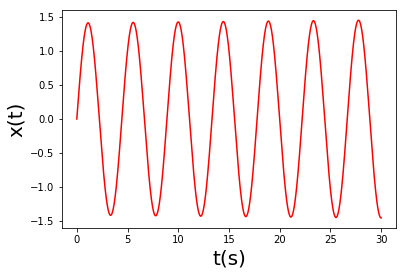

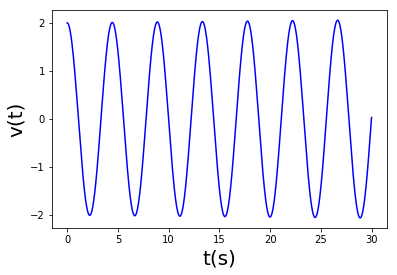

In [27]:
plt.figure()
plt.plot(time,pos,'r');
plt.xlabel('t(s)',fontsize=20)
plt.ylabel('x(t)',fontsize=20)
plt.figure()
plt.plot(time,vel,'b');
plt.xlabel('t(s)',fontsize=20)
plt.ylabel('v(t)',fontsize=20)

Para probar si nuestro método de integracion esta haciendo las cosas bien podemos calcular la energía total de nuestro sistema para observar si esta se conserva

In [28]:
energy = lambda val1,val2: 0.5*m1*val1**2 + 0.5*(k1)*(val2**2)

Text(0,0.5,'Total Energy')

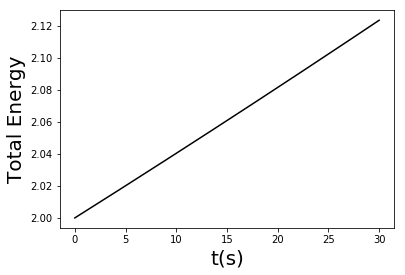

In [29]:
ener1 = energy(vel,pos)
plt.plot(time,ener1,'k');
plt.xlabel('t(s)', fontsize=20)
plt.ylabel('Total Energy', fontsize=20)

# Método Runge-Kutta

In [30]:
def RK4(fun,init_c,const,steps,h):
    x0, v0, t0 = init_c
    c1,c2 = const

    
    x = np.zeros(steps+1)
    v = np.zeros(steps+1)
    t = np.zeros(steps+1)
        
    #apply initial conditions
    x[0] = x0
    v[0] = v0
    t[0] = t0
    
    for i in range(steps):
        
        kx1=h*v[i]
        kv1=h*fun(x[i],c1,c2)
        
        kx2=h*(v[i]+0.5*kv1)
        kv2=h*fun(x[i]+0.5*kx1,c1,c2)
        
        kx3=h*(v[i]+0.5*kv2)
        kv3=h*fun(x[i]+0.5*kx2,c1,c2)
        
        kx4=h*(v[i]+kv3)
        kv4=h*fun(x[i]+kx3,c1,c2)
        
        x[i+1] = x[i]+(kx1+2.0*kx2+2.0*kx3+kx4)/6.0
        v[i+1] = v[i]+(kv1+2.0*kv2+2.0*kv3+kv4)/6.0
        
        t[i+1] = t[i] + h
        
    return x, v, t


In [35]:
pos1, vel1, time1 = RK4(equation,(0.0,2.,0.),(k1,m1),3000,1e-2)

Text(0,0.5,'v(t)')

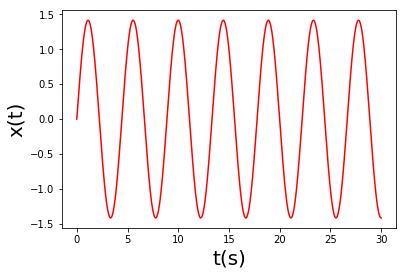

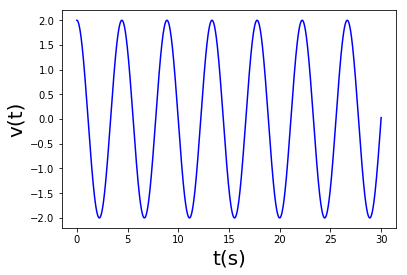

In [36]:
plt.figure()
plt.plot(time1,pos1,'r');
plt.xlabel('t(s)',fontsize=20)
plt.ylabel('x(t)',fontsize=20)
plt.figure()
plt.plot(time1,vel1,'b');
plt.xlabel('t(s)', fontsize=20)
plt.ylabel('v(t)', fontsize=20)

In [37]:
ener2 = energy(vel1,pos1)

Text(0,0.5,'Total Energy')

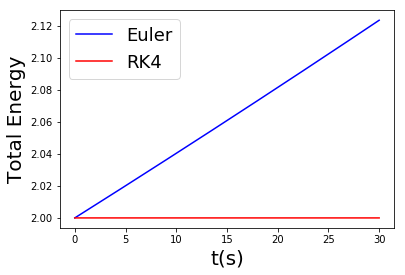

In [38]:
plt.figure()
plt.plot(time,ener1,'b',label='Euler')
plt.plot(time1,ener2,'r',label='RK4')
plt.legend(loc='best',fontsize=18)
plt.xlabel('t(s)', fontsize=20)
plt.ylabel('Total Energy', fontsize=20)

Ahora, aplicar esta metodología para un oscilador amortiguado de la forma

$$m\ddot{x}+\beta\dot{x}+kx=0$$

In [40]:
def RK4_v2(fun,init_c,const,steps,h):
    x0, v0, t0 = init_c
    c1,c2,c3 = const

    
    x = np.zeros(steps+1)
    v = np.zeros(steps+1)
    t = np.zeros(steps+1)
        
    #apply initial conditions
    x[0] = x0
    v[0] = v0
    t[0] = t0
    
    for i in range(steps):
        
        kx1=h*v[i]
        kv1=h*fun(x[i],v[i],c1,c2,c3)
        
        kx2=h*(v[i]+0.5*kv1)
        kv2=h*fun(x[i]+0.5*kx1,v[i]+0.5*kv1,c1,c2,c3)
        
        kx3=h*(v[i]+0.5*kv2)
        kv3=h*fun(x[i]+0.5*kx2,v[i]+0.5*kv2,c1,c2,c3)
        
        kx4=h*(v[i]+kv3)
        kv4=h*fun(x[i]+kx3,v[i]+kv3,c1,c2,c3)
        
        x[i+1] = x[i]+(kx1+2.0*kx2+2.0*kx3+kx4)/6.0
        v[i+1] = v[i]+(kv1+2.0*kv2+2.0*kv3+kv4)/6.0
        
        t[i+1] = t[i] + h
        
    return x, v, t

In [42]:
def equation2(z,w,k,m,b):
    omega = np.sqrt(k/m)
    return -(omega**2)*z - (b/m)*w

In [43]:
pos2, vel2, time2 = RK4_v2(equation2,(0.0,2.0,0.0),(k1,m1,0.5),3000,1e-2) 

Text(0,0.5,'x(t)')

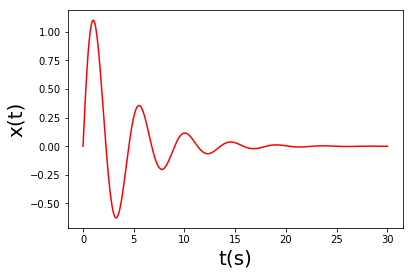

In [44]:
plt.figure()
plt.plot(time2,pos2,'r');
plt.xlabel('t(s)',fontsize=20)
plt.ylabel('x(t)',fontsize=20)

# Solución usando rutinas de python

In [48]:
from scipy.integrate import odeint

In [49]:
def osc_amort(z,t,k,m,b):
    vx,x=z
    omega = np.sqrt(k/m)
    return [-(omega**2)*x - (b/m)*vx,vx]

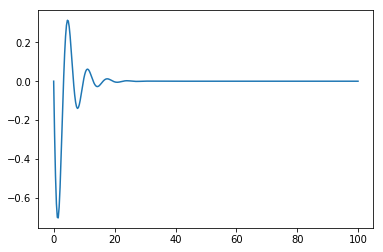

In [53]:
z0 =[0,1.0]
t = np.arange(0,100,0.3)
sol = odeint(osc_amort, z0, t, args=(1.,1.,0.5))
#plt.plot(t,sol[:,1])
plt.plot(t,sol[:,0])



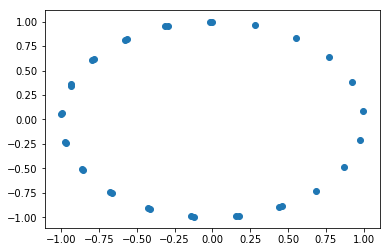

In [49]:
plt.scatter(sol[:,0],sol[:,1])

In [50]:
def osc_amort(z,t,k,m,b):
    vx,x=z
    omega = np.sqrt(k/m)
    return [-(omega**2)*x - (b/m)*vx,vx]

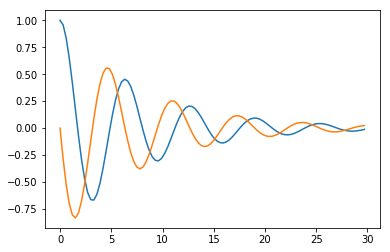

In [51]:
z0 =[0,1.0]
t = np.arange(0,30,0.3)
sol = odeint(osc_amort, z0, t, args=(1,1,0.25,))
plt.plot(t,sol[:,1])
plt.plot(t,sol[:,0])

In [54]:
from scipy.integrate import solve_ivp
def osc_arm(t,z):
    vx,x=z  
    omega=1.
    return [-omega*x,vx]
z0 =[0,1.0]


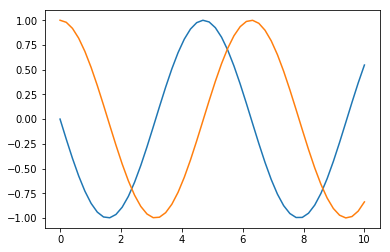

In [55]:
t=np.linspace(0,10,50)
sol = solve_ivp(osc_arm,[0,30],z0,t_eval=t,method='RK45')
plt.plot(sol.t,sol.y[0])
plt.plot(sol.t,sol.y[1])